# **Integrating 10x, Smart-seq4 and slide-tag (spatial) data**

## **1. Deciphering 10x multiome (RNA) and slide-tag data**

In [1]:
import CellMemory as cellmemory
import numpy as np
import pandas as pd
import scanpy as sc
import os
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

#### **Model training**

In [2]:
batch_size = 200
Dataset = 'data/cortex_multiome_train.h5ad'  # train data path
Label = 'celltype'   # the .obs label
Project = 'cortex_slide_tag'  # Project name


# *********************************** #
# >> Forming intuition for cells.. << #
# *********************************** #
Reading Data: cortex_slide_tag
Train set: (34225, 3000)
Valid set: (8556, 3000)
Batch size: 200
Max bins: 8
Learning Categories: 7
use topk: False
CellMemory is delineating cell representations..

----- [Epoch: 1] -----


Train >>>
Loss: 1.089   Acc: 59.22   F1 (Macro): 53.43


Valid >>>
Loss: 0.208   Acc: 93.78   F1 (Macro): 93.24
Saving..
Run time: 148 s

----- [Epoch: 2] -----


Train >>>
Loss: 0.187   Acc: 94.60   F1 (Macro): 94.08


Valid >>>
Loss: 0.151   Acc: 95.55   F1 (Macro): 95.34
Saving..
Run time: 149 s

----- [Epoch: 3] -----


Train >>>
Loss: 0.147   Acc: 95.68   F1 (Macro): 95.34


Valid >>>
Loss: 0.128   Acc: 95.92   F1 (Macro): 95.59
Saving..
Run time: 149 s

----- [Epoch: 4] -----


Train >>>
Loss: 0.129   Acc: 96.10   F1 (Macro): 95.80


Valid >>>
Loss: 0.119   Acc: 96.38   F1 (Macro): 96.09
Saving..
Run time: 150 s

----- [Epoch: 5] -----


Train >>>
Loss: 0.117   Acc: 96.44   F1 (Macro): 96.25


Valid >>>
Loss: 0.122   Acc: 96.22   F1 (Macro): 95.92
Run time: 150 s

----- [Epoch: 6] -----


Train >>>
Loss: 0.109   Acc: 96.75   F1 (Macro): 96.56


Valid >>>
Loss: 0.110   Acc: 96.59   F1 (Macro): 96.21
Saving..
Run time: 149 s

----- [Epoch: 7] -----


Train >>>
Loss: 0.102   Acc: 96.80   F1 (Macro): 96.55


Valid >>>
Loss: 0.102   Acc: 96.91   F1 (Macro): 96.52
Saving..
Run time: 150 s

----- [Epoch: 8] -----


Train >>>
Loss: 0.097   Acc: 97.04   F1 (Macro): 96.87


Valid >>>
Loss: 0.106   Acc: 96.77   F1 (Macro): 96.37
Run time: 150 s

----- [Epoch: 9] -----


Train >>>
Loss: 0.093   Acc: 97.05   F1 (Macro): 96.80


Valid >>>
Loss: 0.098   Acc: 96.96   F1 (Macro): 96.77
Saving..
Run time: 149 s

----- [Epoch: 10] -----


Train >>>
Loss: 0.087   Acc: 97.27   F1 (Macro): 97.12


Valid >>>
Loss: 0.100   Acc: 96.93   F1 (Macro): 96.68
Run time: 149 s

----- [Epoch: 11] -----


Train >>>
Loss: 0.083   Acc: 97.38   F1 (Macro): 97.18


Valid >>>
Loss: 0.097   Acc: 96.93   F1 (Macro): 96.48
Saving..
Run time: 150 s

----- [Epoch: 12] -----


Train >>>
Loss: 0.080   Acc: 97.50   F1 (Macro): 97.43


Valid >>>
Loss: 0.094   Acc: 97.03   F1 (Macro): 96.72
Saving..
Run time: 149 s

----- [Epoch: 13] -----


Train >>>
Loss: 0.074   Acc: 97.62   F1 (Macro): 97.55


Valid >>>
Loss: 0.098   Acc: 96.97   F1 (Macro): 96.76
Run time: 150 s

----- [Epoch: 14] -----


Train >>>
Loss: 0.074   Acc: 97.67   F1 (Macro): 97.54


Valid >>>
Loss: 0.098   Acc: 96.91   F1 (Macro): 96.64
Run time: 150 s

----- [Epoch: 15] -----


Train >>>
Loss: 0.067   Acc: 97.79   F1 (Macro): 97.67


Valid >>>
Loss: 0.104   Acc: 96.74   F1 (Macro): 96.38
Run time: 149 s

----- [Epoch: 16] -----


Train >>>
Loss: 0.064   Acc: 97.91   F1 (Macro): 97.85


Valid >>>
Loss: 0.106   Acc: 96.82   F1 (Macro): 96.36
Run time: 149 s

----- [Epoch: 17] -----


Train >>>
Loss: 0.067   Acc: 97.74   F1 (Macro): 97.62


Valid >>>
Loss: 0.101   Acc: 97.01   F1 (Macro): 96.60
Run time: 150 s

Early stopping
Total time: 2547 s

Plotting..


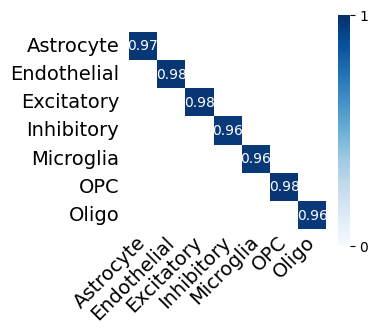

In [3]:
cellmemory.train(Dataset, Label=Label, Project=Project, batch_size=batch_size)

#### **Check the output file**

In [3]:
from pprint import pprint
file = os.listdir(Project)
pprint(file)

['coembed_batch.png',
 'coembed.png',
 'fig_acc.pdf',
 'cortex_slide_tag_idx2celltype.txt',
 'fig_f1.pdf',
 'cls_celltype.png',
 'cortex_slide_tag_ref_gene.txt',
 'MaxBin.txt',
 'coembed_Pred.png',
 'cls.png',
 'coembed_cortex_slide_tag.h5ad',
 'coembed_celltype.png',
 'cortex_slide_tag_ckpt.pth',
 'fig_loss.pdf',
 'fig_conf_mat_valid.pdf',
 'ConfMat_cortex_slide_tag_test.pdf',
 'cls_spatial.png']


#### **Predict the query dataset**

In [4]:
Model = Project+'_ckpt.pth'
batch_size = 100
test_data = sc.read_h5ad('data/adata_slide_test.h5ad')

In [5]:
adata_pred = cellmemory.predict(test_data, Model, Project=Project, batch_size=batch_size, out_Tag=False)


Loading Model from: cortex_slide_tag
Reference Categories: 7
Query set: (4065, 3000)
Query Max bins: 8
Ref Max bins: 8
Do not Need Padding
use topk: False
==> Resuming from checkpoint..
CellMemory is deciphering query cells..


Done!


#### **Access the performance**

In [6]:
cellmemory.assess(test_data.obs[Label], adata_pred.obs['Pred'])

Accuracy is 95.50
F1 score(Macro) is 93.03


#### **Plot**

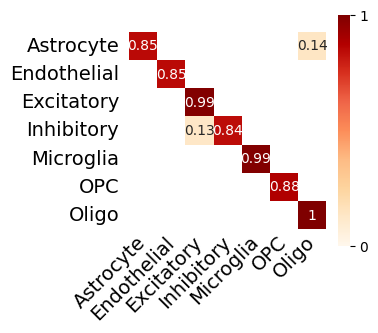

In [7]:
import plot
os.chdir(Project)
plot.plot_conf_mat(
            test_data.obs[Label], 
            adata_pred.obs['Pred'], 
            'ConfMat_'+Project+'_test.pdf', 
            cmap='OrRd'
)

In [8]:
sc.pp.pca(adata_pred)
sc.pp.neighbors(adata_pred)
sc.tl.umap(adata_pred)

adata_pred.obs['celltype'] = list(test_data.obs[Label])
adata_pred.obsm['spatial'] = np.vstack((list(test_data.obs['spatial_X']), list(test_data.obs['spatial_Y']))).T

adata_pred

AnnData object with n_obs × n_vars = 4065 × 256
    obs: 'Pred', 'Pred_prob', 'celltype'
    uns: 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

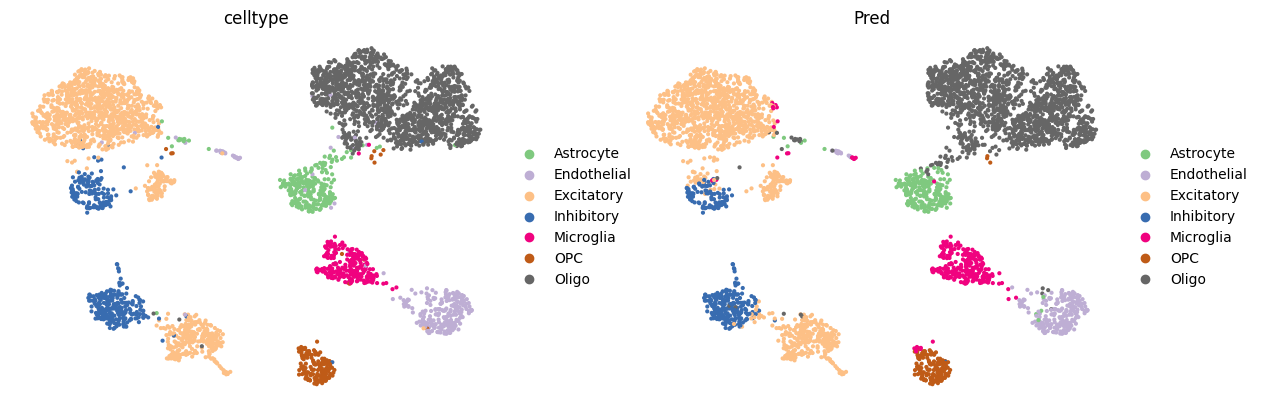

In [9]:
sc.pl.umap(adata_pred, color=['celltype','Pred'], frameon=False, show=False, size=36, palette='Accent')
plt.savefig('cls.png', dpi=300, bbox_inches="tight")

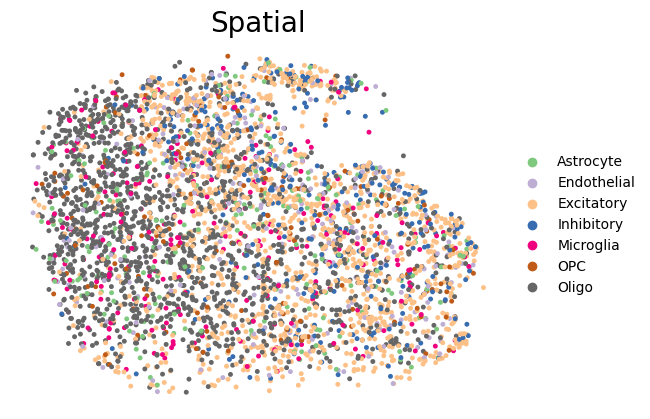

In [10]:
sc.pl.embedding(adata_pred, basis='spatial', color='Pred', frameon=False, show=False, size=50, palette='Accent')
plt.title('Spatial', fontsize=20)
plt.savefig('cls_spatial.png', dpi=300, bbox_inches="tight")

### **Integrating the reference (10x multiome) and query (slide-tag)**

In [11]:
os.chdir('..')
test = sc.read_h5ad('data/adata_slide_test.h5ad')
train = sc.read_h5ad('data/cortex_multiome_train.h5ad')
test.obs['batch_id'] = 'query'
train.obs['batch_id'] = 'reference'
test_data = sc.AnnData.concatenate(train, test)

#### **To generate the cls for ref and query**

In [12]:
adata_pred = cellmemory.predict(test_data, Model, Project=Project, batch_size=batch_size, out_Tag=False)


Loading Model from: cortex_slide_tag
Reference Categories: 7
Query set: (46846, 3000)
Query Max bins: 8
Ref Max bins: 8
Do not Need Padding
use topk: False
==> Resuming from checkpoint..
CellMemory is deciphering query cells..


Done!


In [13]:
cellmemory.assess(test_data.obs[Label], adata_pred.obs['Pred'])

Accuracy is 97.65
F1 score(Macro) is 97.35


#### **Plot**

In [14]:
os.chdir(Project)
sc.pp.pca(adata_pred)
sc.pp.neighbors(adata_pred)
sc.tl.umap(adata_pred)

adata_pred.obs['celltype'] = list(test_data.obs[Label])
adata_pred.obs['batch_id'] = list(test_data.obs['batch_id'])
adata_pred

AnnData object with n_obs × n_vars = 46846 × 256
    obs: 'Pred', 'Pred_prob', 'celltype', 'batch_id'
    uns: 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

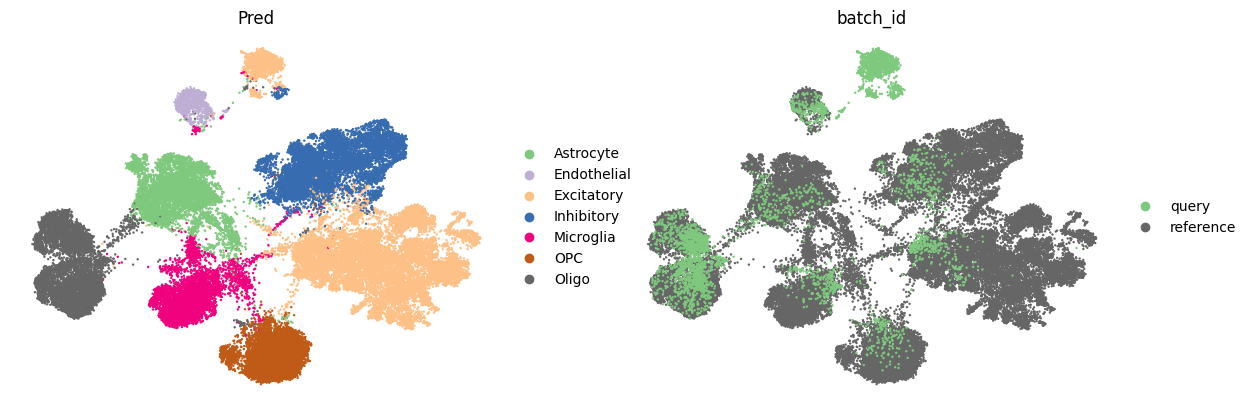

In [15]:
sc.pl.umap(adata_pred, color=['Pred','batch_id'], frameon=False, show=False, size=12, palette='Accent')
plt.savefig('coembed.png', dpi=300, bbox_inches="tight")

In [16]:
# write
adata_pred.write('coembed_'+Project+'.h5ad')

## **2. Deciphering 10x 3', Smart-seq4 and Slide-tag dataset**

In [1]:
import CellMemory as cellmemory
import numpy as np
import pandas as pd
import scanpy as sc
import os
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

#### **Model train**

In [2]:
batch_size = 200
Dataset = 'data/cortex_human_train.h5ad'  # train data path
Label = 'Subclass'   # the .obs label
Project = 'cortex_slide_tag_l2'  # Project name


# *********************************** #
# >> Forming intuition for cells.. << #
# *********************************** #
Reading Data: cortex_slide_tag_l2
Train set: (125028, 3000)
Valid set: (31257, 3000)
Batch size: 200
Max bins: 8
Learning Categories: 24
use topk: False
CellMemory is delineating cell representations..

----- [Epoch: 1] -----


Train >>>
Loss: 0.635   Acc: 79.89   F1 (Macro): 71.22


Valid >>>
Loss: 0.099   Acc: 96.78   F1 (Macro): 93.01
Saving..
Run time: 537 s

----- [Epoch: 2] -----


Train >>>
Loss: 0.082   Acc: 97.39   F1 (Macro): 95.42


Valid >>>
Loss: 0.061   Acc: 98.08   F1 (Macro): 96.32
Saving..
Run time: 539 s

----- [Epoch: 3] -----


Train >>>
Loss: 0.060   Acc: 98.10   F1 (Macro): 97.12


Valid >>>
Loss: 0.066   Acc: 97.65   F1 (Macro): 97.24
Run time: 539 s

----- [Epoch: 4] -----


Train >>>
Loss: 0.051   Acc: 98.33   F1 (Macro): 97.59


Valid >>>
Loss: 0.039   Acc: 98.65   F1 (Macro): 97.93
Saving..
Run time: 539 s

----- [Epoch: 5] -----


Train >>>
Loss: 0.046   Acc: 98.47   F1 (Macro): 98.06


Valid >>>
Loss: 0.043   Acc: 98.52   F1 (Macro): 97.76
Run time: 539 s

----- [Epoch: 6] -----


Train >>>
Loss: 0.041   Acc: 98.67   F1 (Macro): 98.24


Valid >>>
Loss: 0.044   Acc: 98.43   F1 (Macro): 97.98
Run time: 539 s

----- [Epoch: 7] -----


Train >>>
Loss: 0.039   Acc: 98.73   F1 (Macro): 98.46


Valid >>>
Loss: 0.043   Acc: 98.58   F1 (Macro): 97.97
Run time: 539 s

----- [Epoch: 8] -----


Train >>>
Loss: 0.037   Acc: 98.75   F1 (Macro): 98.49


Valid >>>
Loss: 0.036   Acc: 98.71   F1 (Macro): 98.51
Saving..
Run time: 539 s

----- [Epoch: 9] -----


Train >>>
Loss: 0.034   Acc: 98.84   F1 (Macro): 98.53


Valid >>>
Loss: 0.037   Acc: 98.77   F1 (Macro): 98.19
Run time: 539 s

----- [Epoch: 10] -----


Train >>>
Loss: 0.032   Acc: 98.91   F1 (Macro): 98.67


Valid >>>
Loss: 0.036   Acc: 98.73   F1 (Macro): 98.20
Run time: 539 s

----- [Epoch: 11] -----


Train >>>
Loss: 0.031   Acc: 98.94   F1 (Macro): 98.76


Valid >>>
Loss: 0.033   Acc: 98.81   F1 (Macro): 98.09
Saving..
Run time: 539 s

----- [Epoch: 12] -----


Train >>>
Loss: 0.029   Acc: 98.97   F1 (Macro): 98.95


Valid >>>
Loss: 0.031   Acc: 98.93   F1 (Macro): 98.72
Saving..
Run time: 540 s

----- [Epoch: 13] -----


Train >>>
Loss: 0.028   Acc: 99.02   F1 (Macro): 98.83


Valid >>>
Loss: 0.033   Acc: 98.80   F1 (Macro): 98.50
Run time: 539 s

----- [Epoch: 14] -----


Train >>>
Loss: 0.027   Acc: 99.07   F1 (Macro): 99.02


Valid >>>
Loss: 0.042   Acc: 98.62   F1 (Macro): 98.39
Run time: 540 s

----- [Epoch: 15] -----


Train >>>
Loss: 0.027   Acc: 99.06   F1 (Macro): 99.02


Valid >>>
Loss: 0.031   Acc: 98.92   F1 (Macro): 98.62
Saving..
Run time: 539 s

----- [Epoch: 16] -----


Train >>>
Loss: 0.025   Acc: 99.11   F1 (Macro): 98.92


Valid >>>
Loss: 0.032   Acc: 98.87   F1 (Macro): 98.77
Run time: 540 s

----- [Epoch: 17] -----


Train >>>
Loss: 0.025   Acc: 99.12   F1 (Macro): 98.89


Valid >>>
Loss: 0.036   Acc: 98.86   F1 (Macro): 98.36
Run time: 539 s

----- [Epoch: 18] -----


Train >>>
Loss: 0.024   Acc: 99.16   F1 (Macro): 99.15


Valid >>>
Loss: 0.033   Acc: 98.87   F1 (Macro): 98.71
Run time: 539 s

----- [Epoch: 19] -----


Train >>>
Loss: 0.023   Acc: 99.17   F1 (Macro): 99.21


Valid >>>
Loss: 0.034   Acc: 98.81   F1 (Macro): 98.76
Run time: 539 s

----- [Epoch: 20] -----


Train >>>
Loss: 0.021   Acc: 99.25   F1 (Macro): 99.27


Valid >>>
Loss: 0.029   Acc: 98.99   F1 (Macro): 98.70
Saving..
Run time: 539 s

----- [Epoch: 21] -----


Train >>>
Loss: 0.020   Acc: 99.26   F1 (Macro): 99.23


Valid >>>
Loss: 0.032   Acc: 98.93   F1 (Macro): 98.65
Run time: 539 s

----- [Epoch: 22] -----


Train >>>
Loss: 0.021   Acc: 99.26   F1 (Macro): 99.22


Valid >>>
Loss: 0.032   Acc: 98.88   F1 (Macro): 98.48
Run time: 540 s

----- [Epoch: 23] -----


Train >>>
Loss: 0.020   Acc: 99.32   F1 (Macro): 99.24


Valid >>>
Loss: 0.033   Acc: 98.93   F1 (Macro): 98.77
Run time: 540 s

----- [Epoch: 24] -----


Train >>>
Loss: 0.018   Acc: 99.34   F1 (Macro): 99.25


Valid >>>
Loss: 0.034   Acc: 98.96   F1 (Macro): 98.76
Run time: 540 s

----- [Epoch: 25] -----


Train >>>
Loss: 0.018   Acc: 99.33   F1 (Macro): 99.37


Valid >>>
Loss: 0.029   Acc: 98.97   F1 (Macro): 98.85
Run time: 540 s

Early stopping
Total time: 13494 s

Plotting..


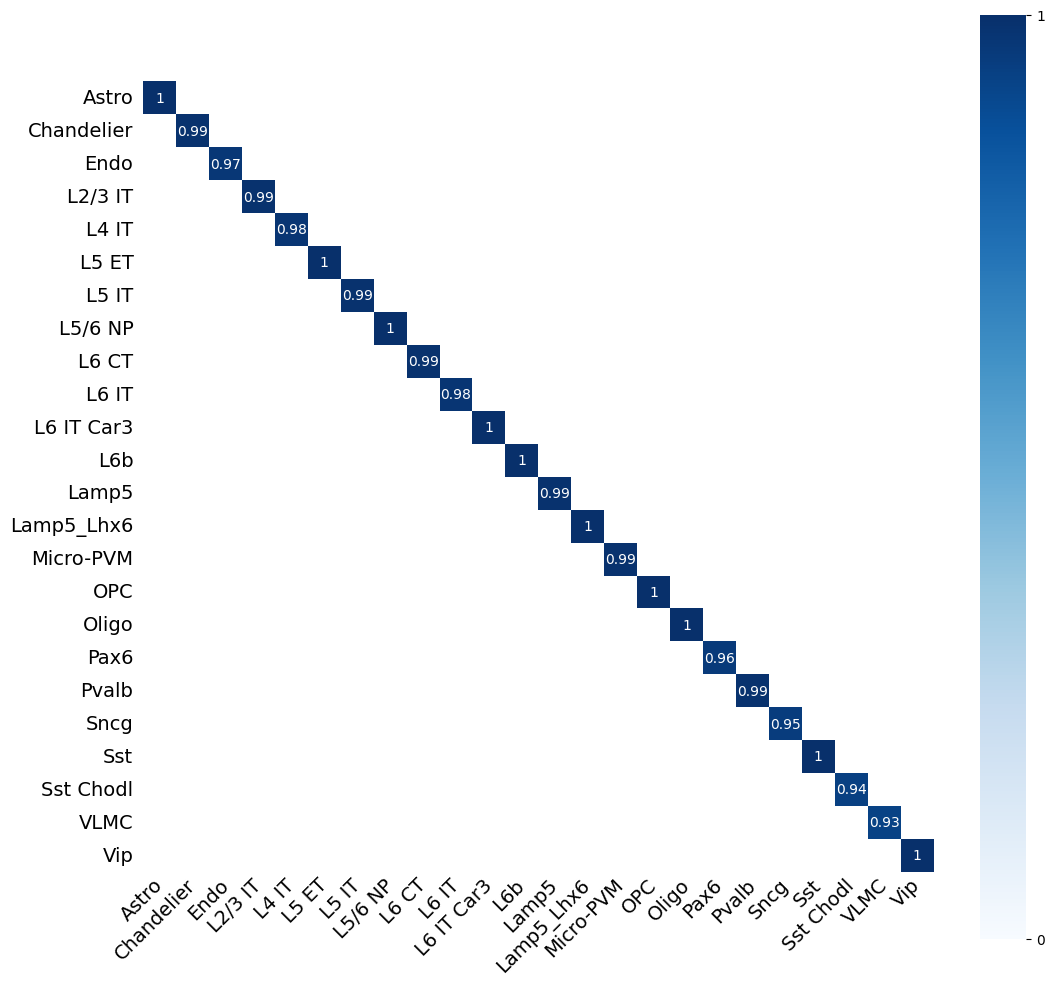

In [3]:
cellmemory.train(Dataset, Label=Label, Project=Project, batch_size=batch_size)

#### **Predict the query dataset**

In [3]:
Model = Project+'_ckpt.pth'
batch_size = 100
test_data = sc.read_h5ad('data/adata_human_slide_test.h5ad')

In [4]:
adata_pred, total_attn, AttentionGene = cellmemory.predict(test_data, Model, Project=Project, batch_size=batch_size, out_Tag=True)


Loading Model from: cortex_slide_tag_l2
Reference Categories: 24
Query set: (4065, 3000)
Query Max bins: 8
Ref Max bins: 8
Do not Need Padding
use topk: False
==> Resuming from checkpoint..
CellMemory is deciphering query cells..


Done!


#### **Plot**

In [5]:
os.chdir(Project)
sc.pp.pca(adata_pred)
sc.pp.neighbors(adata_pred)
sc.tl.umap(adata_pred)

#### **TAGs**

In [6]:
test_data.obs['Pred'] = list(adata_pred.obs['Pred'])
test_data.uns['log1p']['base'] = None
# remain the cluster > 5 cells
adata_exp = test_data.copy()
pos = np.where((adata_exp.obs['Pred']!='Sst Chodl')&(adata_exp.obs['Pred']!='L5 ET')&(adata_exp.obs['Pred']!='Pax6'))[0]
adata_exp = adata_exp[pos,:]

import anndata as ad
attn = ad.AnnData(np.array(total_attn))
attn = attn[pos,:]
attn.obs = adata_exp.obs
attn.var = adata_exp.var

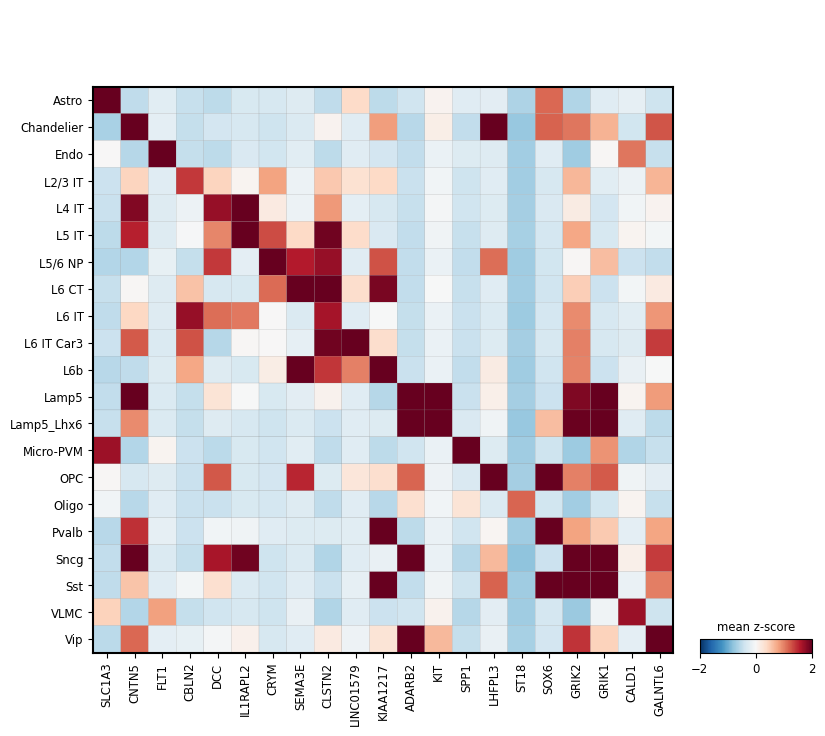

<Figure size 640x480 with 0 Axes>

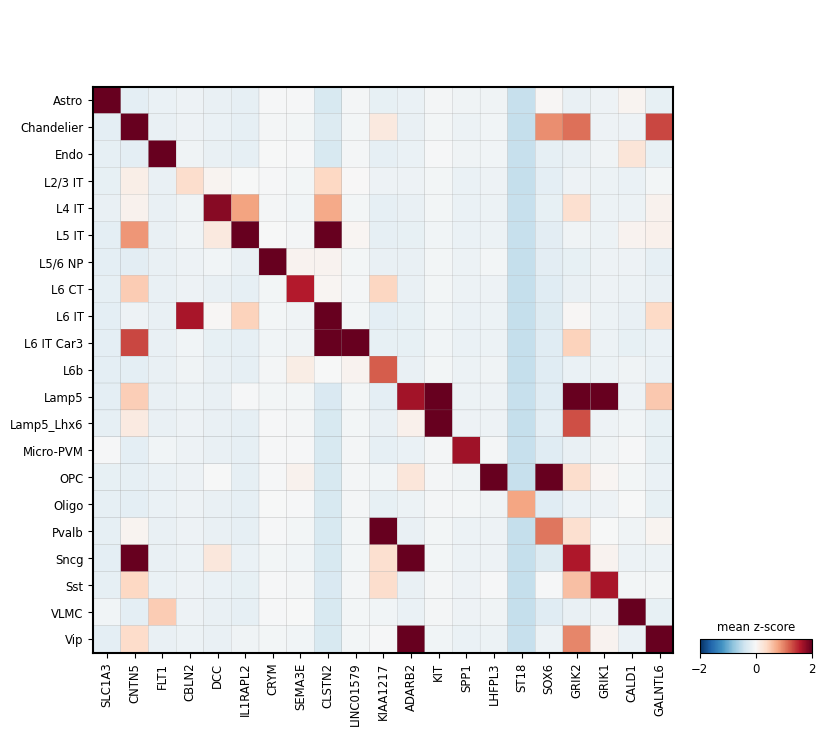

<Figure size 640x480 with 0 Axes>

In [7]:
sc.pp.scale(adata_exp)
sc.pp.scale(attn)
marker = ['SLC1A3', 'CNTN5', 'FLT1', 'CBLN2','DCC','IL1RAPL2','CRYM','SEMA3E','CLSTN2','LINC01579', \
'KIAA1217','ADARB2','KIT','SPP1','LHFPL3','ST18','SOX6','GRIK2','GRIK1','CALD1','GALNTL6']
sc.pl.matrixplot(adata_exp, marker, 'Pred', colorbar_title='mean z-score', \
    vmin=-2, vmax=2, cmap='RdBu_r')  # RdBu_r
plt.savefig('Heatmap_TAGs_exp.pdf', dpi=600, bbox_inches="tight")
# 
sc.pl.matrixplot(attn, marker, 'Pred', colorbar_title='mean z-score', \
    vmin=-2, vmax=2, cmap='RdBu_r')  # RdBu_r
plt.savefig('Heatmap_TAGs_attn.pdf', dpi=600, bbox_inches="tight")

#### **Generate the UMAP using cls**

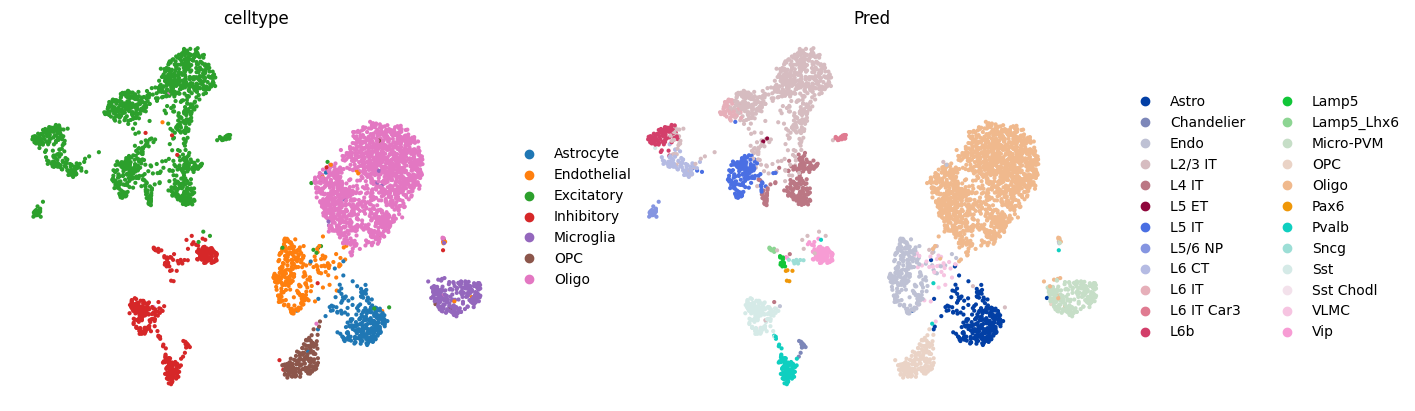

In [8]:
adata_pred.obs['celltype'] = list(test_data.obs['celltype'])
sc.pl.umap(adata_pred, color=['celltype','Pred'], frameon=False, show=False, size=36)
plt.savefig('cls.png', dpi=300, bbox_inches="tight")

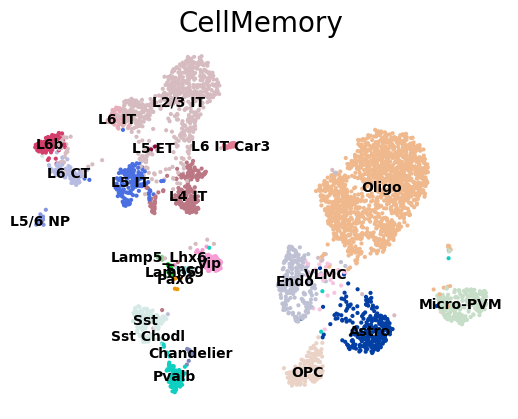

In [9]:
sc.pl.umap(adata_pred, color='Pred', frameon=False, show=False, size=36,legend_loc='on data')
plt.title('CellMemory', fontsize=20)
plt.savefig('cls_Pred.png', dpi=300, bbox_inches="tight")

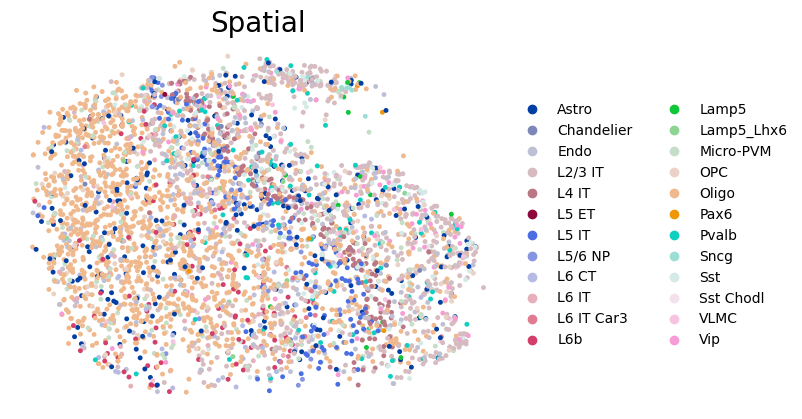

In [10]:
adata_pred.obsm['spatial'] = np.vstack((list(test_data.obs['spatial_X']), list(test_data.obs['spatial_Y']))).T
sc.pl.embedding(adata_pred, basis='spatial', color='Pred', frameon=False, show=False, size=50)
plt.title('Spatial', fontsize=20)
plt.savefig('cls_spatial.png', dpi=300, bbox_inches="tight")

In [11]:
# write
adata_pred.write('cls_'+Project+'.h5ad')

### **To generate the cls for ref and query**

In [12]:
os.chdir('..')
test = sc.read_h5ad('data/adata_human_slide_test.h5ad')
train = sc.read_h5ad('data/cortex_human_train.h5ad')
test.obs['batch_id'] = 'query'
test.obs['assay'] = 'Slide-tag'
train.obs['batch_id'] = 'reference'
test_data = sc.AnnData.concatenate(train, test)

In [13]:
adata_pred = cellmemory.predict(test_data, Model, Project=Project, batch_size=batch_size, out_Tag=False)


Loading Model from: cortex_slide_tag_l2
Reference Categories: 24
Query set: (160350, 3000)
Query Max bins: 8
Ref Max bins: 8
Do not Need Padding
use topk: False
==> Resuming from checkpoint..
CellMemory is deciphering query cells..


Done!


#### **Plot**

In [14]:
os.chdir(Project)
sc.pp.pca(adata_pred)
sc.pp.neighbors(adata_pred)
sc.tl.umap(adata_pred)

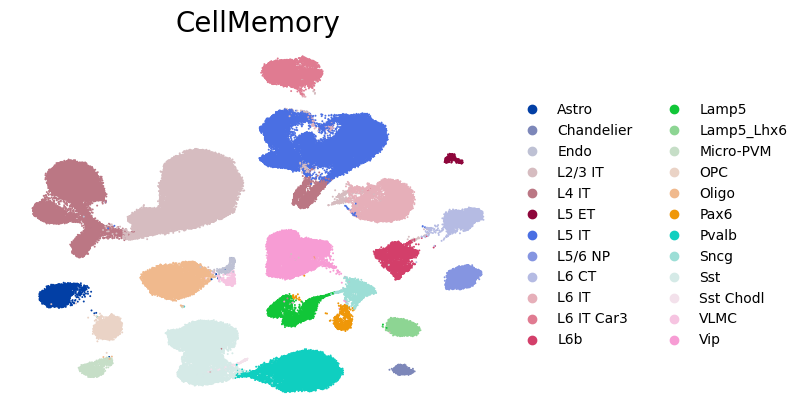

In [15]:
sc.pl.umap(adata_pred, color='Pred', frameon=False, show=False, size=8)
plt.title('CellMemory', fontsize=20)
plt.savefig('coembed_Pred.png', dpi=300, bbox_inches="tight")

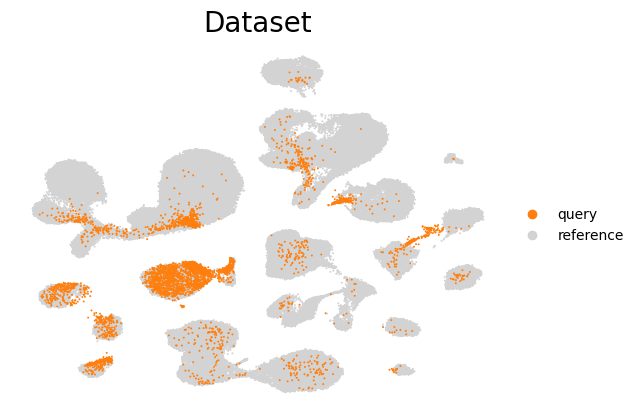

In [18]:
adata_pred.obs['batch_id'] = list(test_data.obs['batch_id'])
adata_pred.uns['batch_id_colors'] = ['#ff7f0e','#D3D3D3']
sc.pl.umap(adata_pred, color='batch_id', frameon=False, show=False, size=8)
plt.title('Dataset', fontsize=20)
plt.savefig('coembed_Batch_ID.png', dpi=300, bbox_inches="tight")

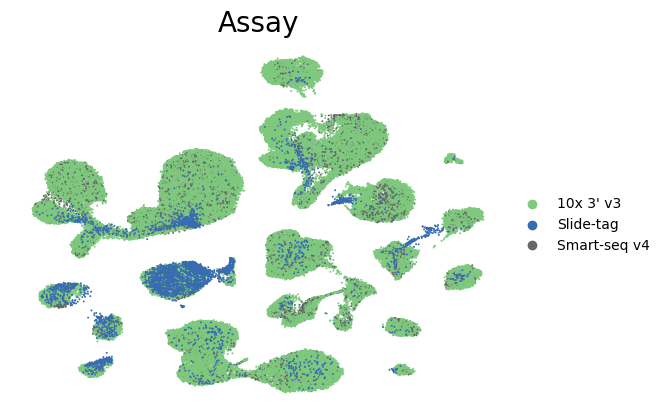

In [19]:
adata_pred.obs['assay'] = list(test_data.obs['assay'])
sc.pl.umap(adata_pred, color='assay', frameon=False, show=False, size=8, palette='Accent')
plt.title('Assay', fontsize=20)
plt.savefig('coembed_assay.png', dpi=300, bbox_inches="tight")

In [20]:
# write
adata_pred.write('coembed_'+Project+'.h5ad')